In [1]:

from Least_Squares_Linear_Regression import linearSquares


https://github.com/sehrsam/sehrsam.github.io/blob/main/posts/Least-Squares/Least_Squares_Linear_Regression.py


In [2]:
import numpy as np
from matplotlib import pyplot as plt

np.random.seed(37638)
def pad(X):
    return np.append(X, np.ones((X.shape[0], 1)), 1)

def LR_data(n_train = 100, n_val = 100, p_features = 1, noise = .1, w = None):
    if w is None: 
        w = np.random.rand(p_features + 1) + .2
    
    X_train = np.random.rand(n_train, p_features)
    y_train = pad(X_train)@w + noise*np.random.randn(n_train)

    X_val = np.random.rand(n_val, p_features)
    y_val = pad(X_val)@w + noise*np.random.randn(n_val)
    
    return X_train, y_train, X_val, y_val

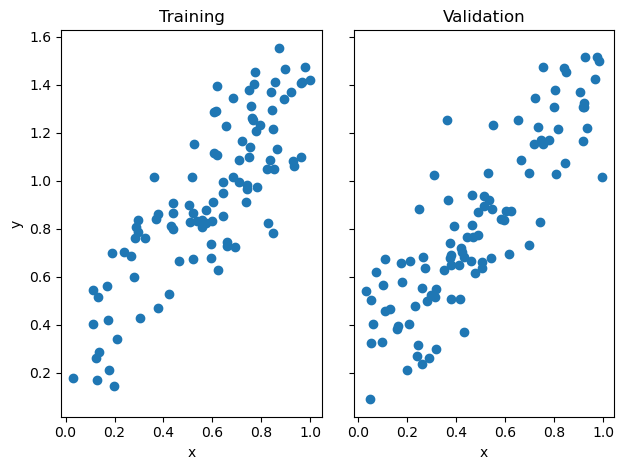

In [3]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

# plot it
fig, axarr = plt.subplots(1, 2, sharex = True, sharey = True)
axarr[0].scatter(X_train, y_train)
axarr[1].scatter(X_val, y_val)
labs = axarr[0].set(title = "Training", xlabel = "x", ylabel = "y")
labs = axarr[1].set(title = "Validation", xlabel = "x")
plt.tight_layout()

The first thing that we want to do is to create our set of test datapoints. When p_features = 1, we can visualize them like so.

In [4]:
LR = linearSquares()
LR.fitAnalytic(X_train, y_train)



If we use the analytic method of fit, we get the following scores:

In [5]:
print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")

Training score = 0.6848
Validation score = 0.7319


Since a score is better the higher that it is, noting that the score cannot exceed 1, the scores of 0.648 and 0.739 are solid. However, the analytic method is not the only way to implement least squares linear regression. We are also able to use gradient descent to set our weights. Using it, we get the following scores:

In [23]:
LR2 = linearSquares()
LR2.fitGradient(X_train, y_train, alpha = 0.001, max_iters = 100)
print(f"Training score = {LR2.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR2.score(X_val, y_val).round(4)}")


Training score = 0.8786
Validation score = 0.9089


These scores are also very good. We can go further, and look at how this score changes over time by taking a look at the score history, and see how it improves over iterations.

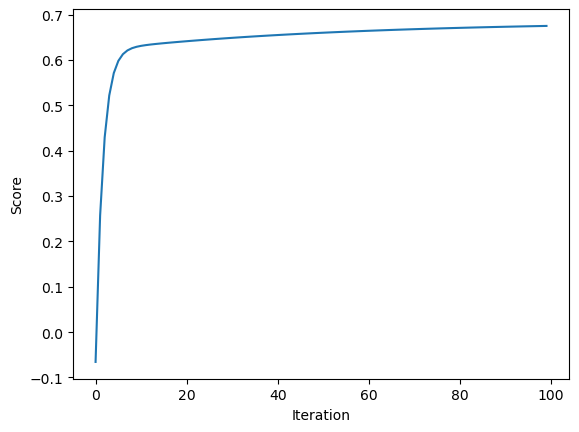

In [7]:
plt.plot(LR2.score_history)
labels = plt.gca().set(xlabel = "Iteration", ylabel = "Score")

We can experiment with using more features, seeing how it changes the effectiveness of our models. Since there are going to be more than 2 features, it is tough to visualize our data. However, we can still see the effectiveness of our models by using the score function of our linearSquares class.

In [9]:
n_train = 100
n_val = 100
p_features = 10
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)



When we try our analytic method, we get the following scores:

In [10]:
LR = linearSquares()
LR.fitAnalytic(X_train, y_train) 

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")

Training score = 0.6702
Validation score = 0.6666


Doing the same with using gradient descent we get:

In [11]:
LR2 = linearSquares()
LR2.fitGradient(X_train, y_train, alpha = 0.001, max_iters = 100)


In [24]:
LR2 = linearSquares()
LR2.fitGradient(X_train, y_train, alpha = 0.001, max_iters = 100)
print(f"Training score = {LR2.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR2.score(X_val, y_val).round(4)}")


Training score = 0.8851
Validation score = 0.9168


The scores for these are pretty similar to their p_features = 1 counterparts. If we increase the number of features up to 50 we get the following scores for the analytic method:

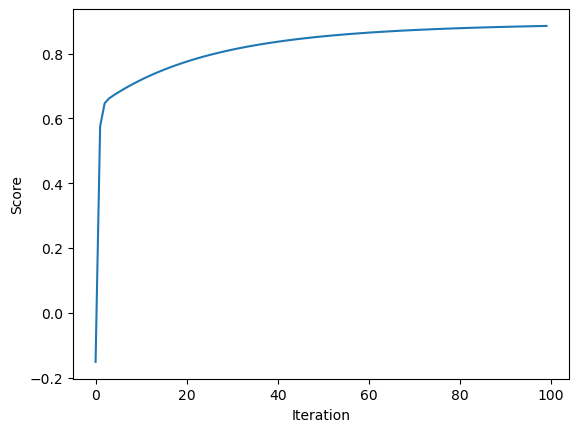

In [26]:
n_train = 100
n_val = 100
p_features = 50
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)


In [27]:
LR = linearSquares()
LR.fitAnalytic(X_train, y_train) 

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")

Training score = 0.9911
Validation score = 0.9712


And for gradient descent we get

In [30]:
LR2 = linearSquares()
LR2.fitGradient(X_train, y_train, alpha = 0.0001, max_iters = 100)
print(f"Training score = {LR2.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR2.score(X_val, y_val).round(4)}")


Training score = 0.8479
Validation score = 0.8598


These are still similar. When we increase it to 99 features we get the following scores for the analytic method

In [31]:
n_train = 100
n_val = 100
p_features = 99
noise = 0.2

# create some data
X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)


In [16]:
LR = linearSquares()
LR.fitAnalytic(X_train, y_train) 

print(f"Training score = {LR.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR.score(X_val, y_val).round(4)}")

Training score = 0.8992
Validation score = 0.9416


In [ ]:
And the following for gradient descent:

In [34]:
LR2 = linearSquares()
LR2.fitGradient(X_train, y_train, alpha = 0.001, max_iters = 100)
print(f"Training score = {LR2.score(X_train, y_train).round(4)}")
print(f"Validation score = {LR2.score(X_val, y_val).round(4)}")


Training score = -5.133801039647608e+122
Validation score = -6.632516808757505e+122


From this we can see how overfitting affects the gradient descent method.

We can also look at the lasso algorithm from sklearn

In [35]:
from sklearn.linear_model import Lasso
L = Lasso(alpha = 0.001)

Doing the same experiments we just did we can see how it does with many features. First with one feature:

In [37]:
n_train = 100
n_val = 100
p_features = 1
noise = 0.2

X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

L.fit(X_train, y_train)
print(f"Training score = {L.score(X_train, y_train).round(4)}")
print(f"Validation score = {L.score(X_val, y_val).round(4)}")

Training score = 0.0803
Validation score = 0.2088


Then with 10:

In [38]:
n_train = 100
n_val = 100
p_features = 10
noise = 0.2

X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

L.fit(X_train, y_train)
print(f"Training score = {L.score(X_train, y_train).round(4)}")
print(f"Validation score = {L.score(X_val, y_val).round(4)}")

Training score = 0.9405
Validation score = 0.9056


Then with 50:

In [39]:
n_train = 100
n_val = 100
p_features = 50
noise = 0.2

X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

L.fit(X_train, y_train)
print(f"Training score = {L.score(X_train, y_train).round(4)}")
print(f"Validation score = {L.score(X_val, y_val).round(4)}")

Training score = 0.9947
Validation score = 0.9626


And finally with 99

In [40]:
n_train = 100
n_val = 100
p_features = 99
noise = 0.2

X_train, y_train, X_val, y_val = LR_data(n_train, n_val, p_features, noise)

L.fit(X_train, y_train)
print(f"Training score = {L.score(X_train, y_train).round(4)}")
print(f"Validation score = {L.score(X_val, y_val).round(4)}")

Training score = 0.9988
Validation score = 0.7424


We can see that the validation score remains high even when the number of features is high, which is different to that of the gradient descent